In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
x= spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

In [5]:
print(x)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

In [6]:
print(y)

      Class
0         1
1         1
2         1
3         1
4         1
...     ...
4596      0
4597      0
4598      0
4599      0
4600      0

[4601 rows x 1 columns]


In [7]:
x=x.dropna()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {0}".format(round(accuracy,3)))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.922
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       531
           1       0.91      0.90      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

[[498  33]
 [ 39 351]]


In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}
d = {}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    d[model_name] = {'classification_report': report, 'confusion_matrix': confusion,'accuracy':accuracy}
    
for model_name, results in d.items():
    print(f"Model: {model_name}")
    print("Classification Report:\n", results['classification_report'])
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:\n", results['confusion_matrix'])
    print("\n")


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_34/2327326106.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
/opt/

Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       531
           1       0.91      0.90      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

Accuracy: 0.9446254071661238
Confusion Matrix:
 [[498  33]
 [ 39 351]]


Model: Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       531
           1       0.91      0.88      0.90       390

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921

Accuracy: 0.9446254071661238
Confusion Matrix:
 [[497  34]
 [ 46 344]]


Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

    

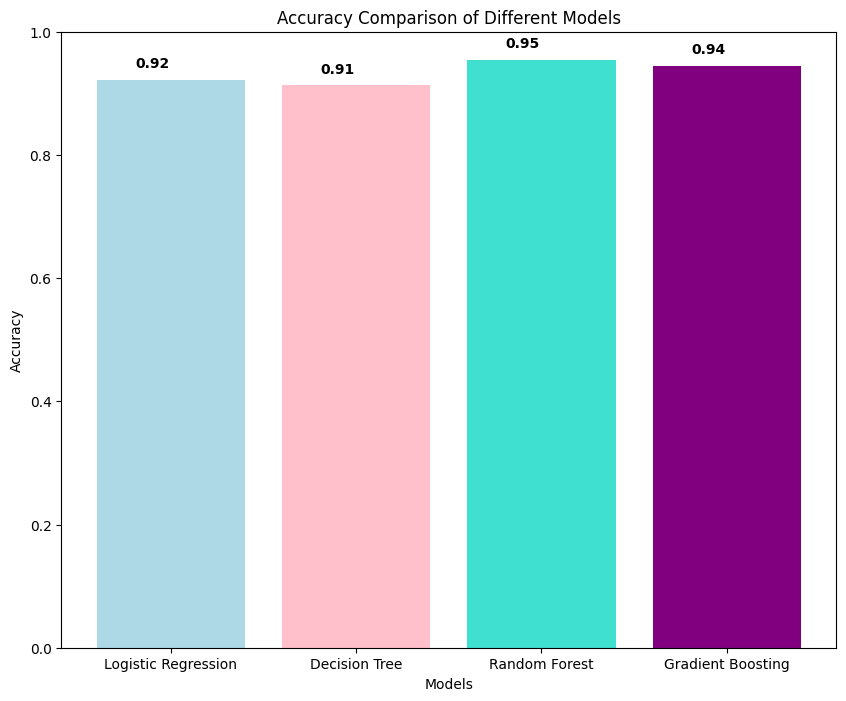

In [30]:
model_names = list(d.keys())
accuracies = [accuracy_score(y_test, model.predict(x_test)) for model in models.values()]
plt.figure(figsize=(10, 8))
bars=plt.bar(model_names, accuracies, color=['lightblue', 'pink', 'turquoise', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', color='black', fontweight='bold')
plt.show()